## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on the several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
3. In your chosen state, which of the lessons are the students more successful, math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 

Submit your work below, and plan on discussing with your mentor. You can also take a look at these [example solutions](https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_data_exploration_1/solution.ipynb).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
# import warnings

# warnings.filterwarnings('ignore')

%matplotlib inline

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [4]:
# CLEAN (YEAR-BY-YEAR)

df2 = df.copy()

cols = ["ENROLL", 
        "TOTAL_REVENUE", 
        "FEDERAL_REVENUE", 
        "STATE_REVENUE", 
        "LOCAL_REVENUE", 
        "TOTAL_EXPENDITURE", 
        "INSTRUCTION_EXPENDITURE", 
        "SUPPORT_SERVICES_EXPENDITURE",
        "OTHER_EXPENDITURE", 
        "CAPITAL_OUTLAY_EXPENDITURE", 
        "GRADES_PK_G", 
        "GRADES_KG_G", 
        "GRADES_4_G", 
        "GRADES_8_G", 
        "GRADES_12_G", 
        "GRADES_1_8_G", 
        "GRADES_9_12_G", 
        "GRADES_ALL_G"]

years = df2["YEAR"].unique()

for col in cols:
    for year in years:
        df2.loc[df2["YEAR"] == year, col] = df2.loc[df2["YEAR"] == year, col].fillna(
            df2[df2["YEAR"] == year][col].mean())

In [5]:
df2.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.385000e+03,1.441000e+03,1.441000e+03,1.441000e+03,1.441000e+03,1.441000e+03,1.441000e+03,1.441000e+03,1.385000e+03,...,1390.000000,1390.000000,1390.000000,1.390000e+03,1.390000e+03,1.390000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.161654e+05,9.084108e+06,7.662749e+05,4.213597e+06,4.104236e+06,9.190557e+06,4.758243e+06,2.677770e+06,4.286507e+05,...,64590.152441,64331.744106,54418.075582,5.196200e+05,2.474932e+05,8.029178e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.003532e+06,1.110204e+07,1.085057e+06,5.237195e+06,5.181475e+06,1.132084e+07,5.947042e+06,3.170760e+06,5.041013e+05,...,79451.944548,78083.976028,67187.337112,6.368932e+05,3.044943e+05,9.456162e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.867590e+05,2.425600e+06,2.068530e+05,1.319582e+06,8.747060e+05,2.427316e+06,1.306105e+06,7.350360e+05,1.199340e+05,...,14190.500000,13698.250000,11161.750000,1.129712e+05,5.270300e+04,1.939785e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,7.374010e+05,5.778507e+06,4.461800e+05,2.857497e+06,2.398344e+06,5.858385e+06,3.033016e+06,1.720824e+06,3.070220e+05,...,44909.500000,44756.500000,37541.500000,3.611705e+05,1.706525e+05,5.983920e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,9.624880e+05,1.116863e+07,8.956420e+05,5.187230e+06,4.995971e+06,1.116970e+07,5.672620e+06,3.333043e+06,5.223475e+05,...,75149.750000,75016.250000,67026.000000,6.052242e+05,2.888522e+05,9.045562e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


## 1. Derive the descriptive statistics of the data and discuss the points you find remarkable

Total mean expendature is slightly greater than total mean revenue, meaning a net loss of money.

Maximum math scores are higher than maximum reading scores, yet minimum math and reading scores are about the same.

Standard deviation of math scores stays about the same from 4th to 8th grade, but stddev of reading scores decreases significantly.

## 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

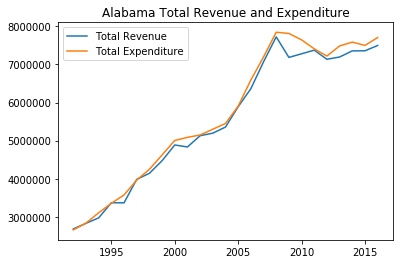

In [23]:
al = df2[df2['STATE'] == 'ALABAMA']

deficit = ['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']

plt.plot(al.loc[:, "YEAR"], al.loc[:, "TOTAL_REVENUE"], label="Total Revenue")

plt.plot(al.loc[:, "YEAR"], al.loc[:, "TOTAL_EXPENDITURE"], label="Total Expenditure")

plt.title("Alabama Total Revenue and Expenditure")
plt.legend()
plt.show()

## 3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [24]:
print("Reading avg:", (al.AVG_READING_4_SCORE.mean() + al.AVG_READING_8_SCORE.mean()) / 2)
print("Math avg:", (al.AVG_MATH_4_SCORE.mean() + al.AVG_MATH_8_SCORE.mean()) / 2)

Reading avg: 238.65798635129525
Math avg: 244.22195411149187


Math

## 4. What are the distributions of the math and reading scores in the sample?

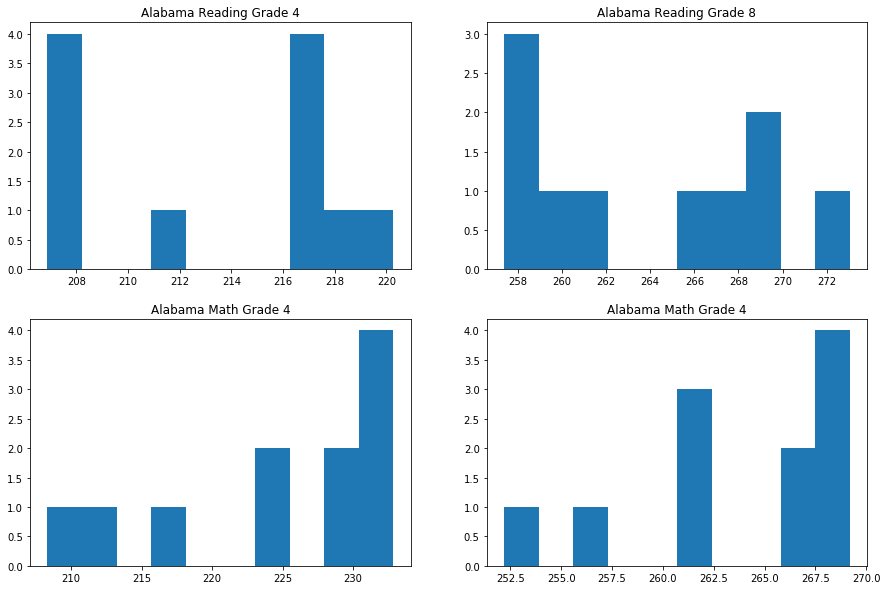

In [31]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.hist(al.AVG_READING_4_SCORE)
plt.title("Alabama Reading Grade 4")

plt.subplot(222)
plt.hist(al.AVG_READING_8_SCORE)
plt.title("Alabama Reading Grade 8")

plt.subplot(223)
plt.hist(al.AVG_MATH_4_SCORE)
plt.title("Alabama Math Grade 4")

plt.subplot(224)
plt.hist(al.AVG_MATH_8_SCORE)
plt.title("Alabama Math Grade 4")

plt.show()

## 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [26]:
al_mean = al.copy()
al_median = al.copy()
al_interp = al.copy()

cols = ['AVG_MATH_4_SCORE', 
        'AVG_MATH_8_SCORE', 
        'AVG_READING_4_SCORE', 
        'AVG_READING_8_SCORE']

# fill w/ mean
for col in cols:
    al_mean.loc[:, col] = al_mean.loc[:, col].fillna(al_mean.loc[:, col].mean())

# fill w/ median
for col in cols:
    al_median.loc[:, col] = al_median.loc[:, col].fillna(al_median.loc[:, col].median())

# fill w/ interpolation
for col in cols:
    al_interp.loc[:, col] = al_interp.loc[:, col].interpolate()

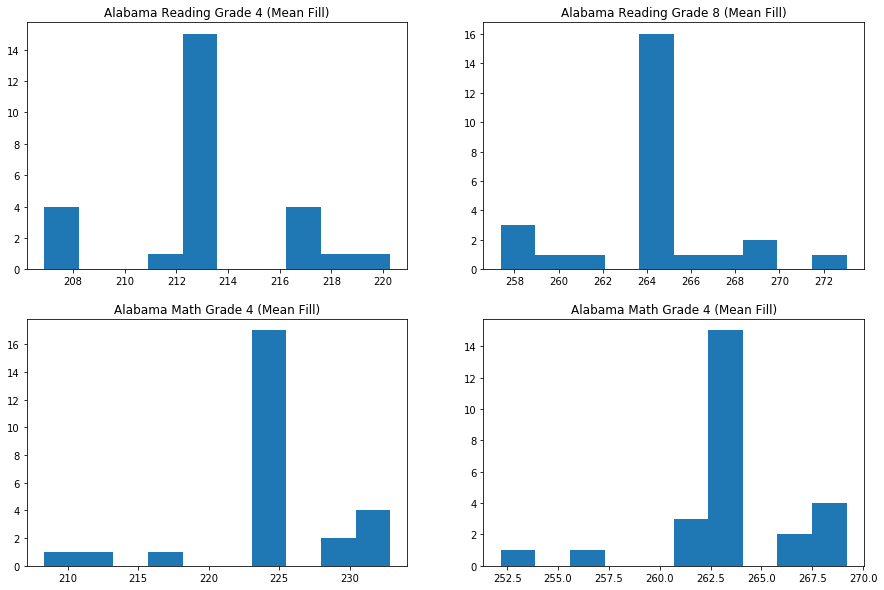

In [27]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.hist(al_mean.AVG_READING_4_SCORE)
plt.title("Alabama Reading Grade 4 (Mean Fill)")

plt.subplot(222)
plt.hist(al_mean.AVG_READING_8_SCORE)
plt.title("Alabama Reading Grade 8 (Mean Fill)")

plt.subplot(223)
plt.hist(al_mean.AVG_MATH_4_SCORE)
plt.title("Alabama Math Grade 4 (Mean Fill)")

plt.subplot(224)
plt.hist(al_mean.AVG_MATH_8_SCORE)
plt.title("Alabama Math Grade 4 (Mean Fill)")

plt.show()

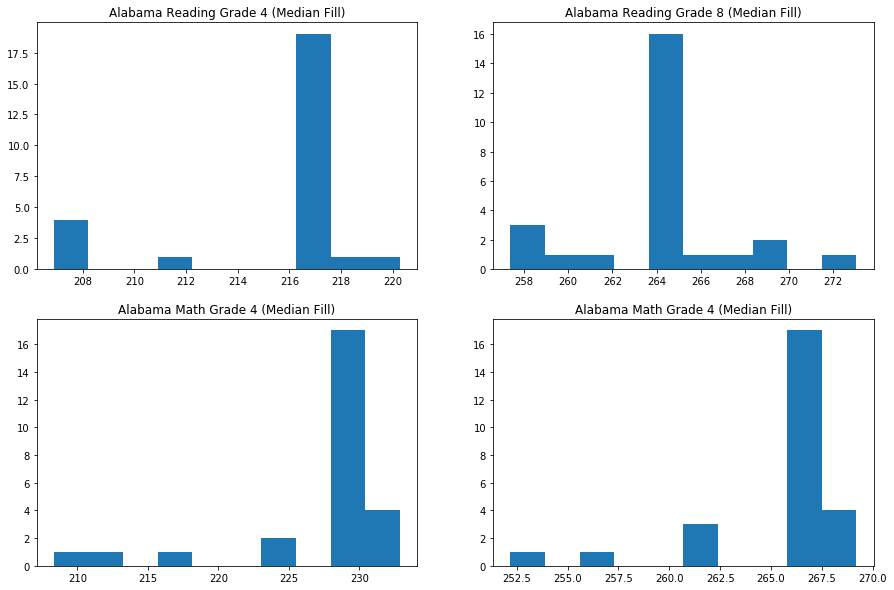

In [28]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.hist(al_median.AVG_READING_4_SCORE)
plt.title("Alabama Reading Grade 4 (Median Fill)")

plt.subplot(222)
plt.hist(al_median.AVG_READING_8_SCORE)
plt.title("Alabama Reading Grade 8 (Median Fill)")

plt.subplot(223)
plt.hist(al_median.AVG_MATH_4_SCORE)
plt.title("Alabama Math Grade 4 (Median Fill)")

plt.subplot(224)
plt.hist(al_median.AVG_MATH_8_SCORE)
plt.title("Alabama Math Grade 4 (Median Fill)")

plt.show()

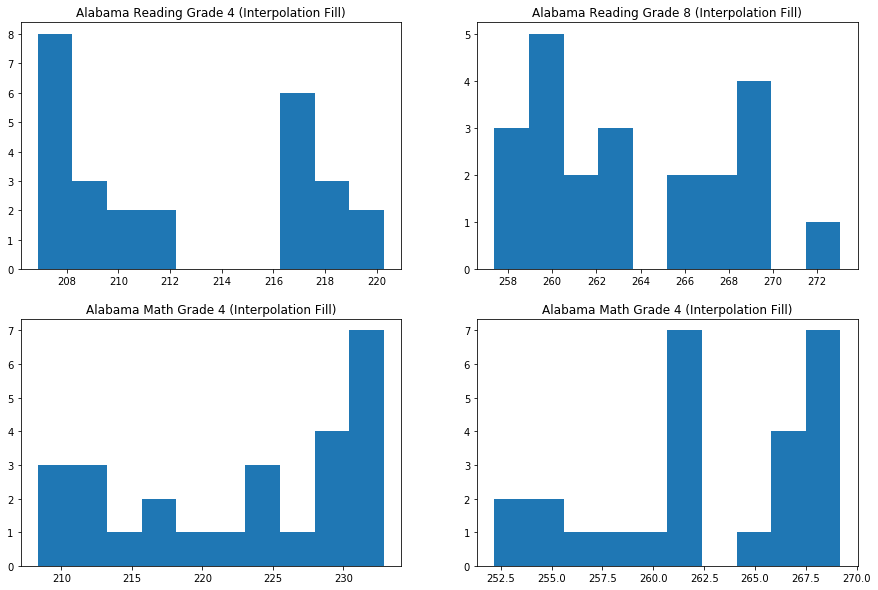

In [29]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.hist(al_interp.AVG_READING_4_SCORE)
plt.title("Alabama Reading Grade 4 (Interpolation Fill)")

plt.subplot(222)
plt.hist(al_interp.AVG_READING_8_SCORE)
plt.title("Alabama Reading Grade 8 (Interpolation Fill)")

plt.subplot(223)
plt.hist(al_interp.AVG_MATH_4_SCORE)
plt.title("Alabama Math Grade 4 (Interpolation Fill)")

plt.subplot(224)
plt.hist(al_interp.AVG_MATH_8_SCORE)
plt.title("Alabama Math Grade 4 (Interpolation Fill)")

plt.show()

While mean and median fills still left the distributions a bit broken up, interpolation seemed to be the best fill method in terms of coming to a more normal distribution.